# Wstępna analiza danych

In [6]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning) #turn off warnings

import pandas as pd
import matplotlib.pyplot as plt
import openpyxl
import numpy as np
import seaborn as sns
from scipy.stats import skew, kurtosis, bootstrap
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import os

Wczytanie danych do DataFrame

In [12]:
folder_path = os.path.join(os.getcwd(), "Selected_fields_of_study")
file_name = "informatyka.xlsx"
file_path = os.path.join(folder_path, file_name)
df = pd.read_excel(file_path).set_index('Przedmioty')

### Wizualizacja zmiennych, wraz z ich szacowanymi gęstościami

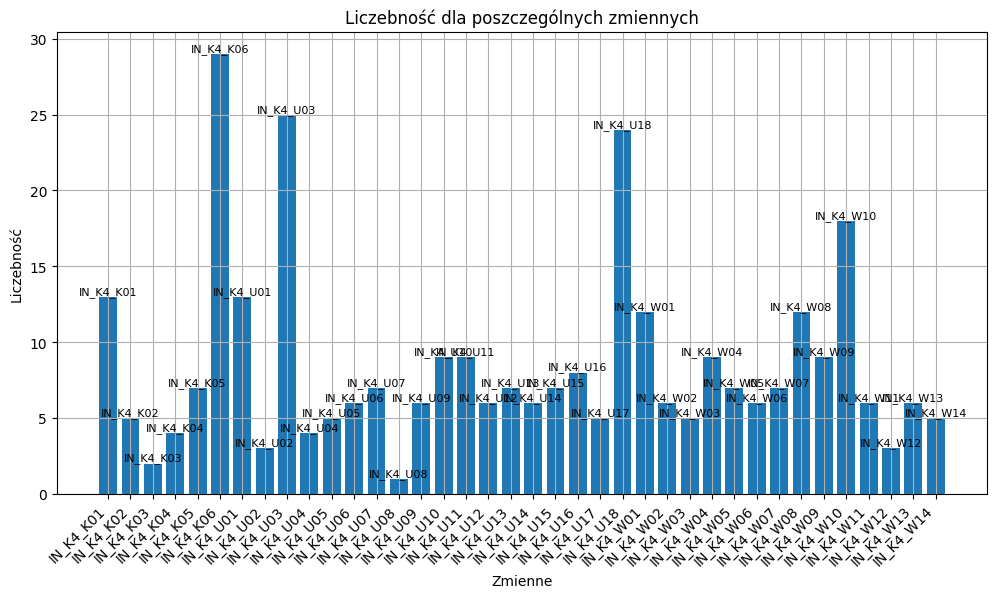

In [14]:
plt.figure(figsize=(12, 6))

suma_codes = [df[col].sum() for col in df.columns] # łączna suma wszystkich wystąpień danego kodu
variable_names = df.columns

bar_plot = plt.bar(variable_names, suma_codes)

# Ustawienie wyrównania etykiet osi x
plt.xticks(rotation=45, ha='right')  
plt.xlabel('Zmienne')
plt.ylabel('Liczebność')
plt.title('Liczebność dla poszczególnych zmiennych')

# Dopasowanie widoczności etykiet do końców słupków
for bar, name in zip(bar_plot, variable_names):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), name, ha='center', va='bottom', fontsize = 8)

plt.grid(True)
plt.show()

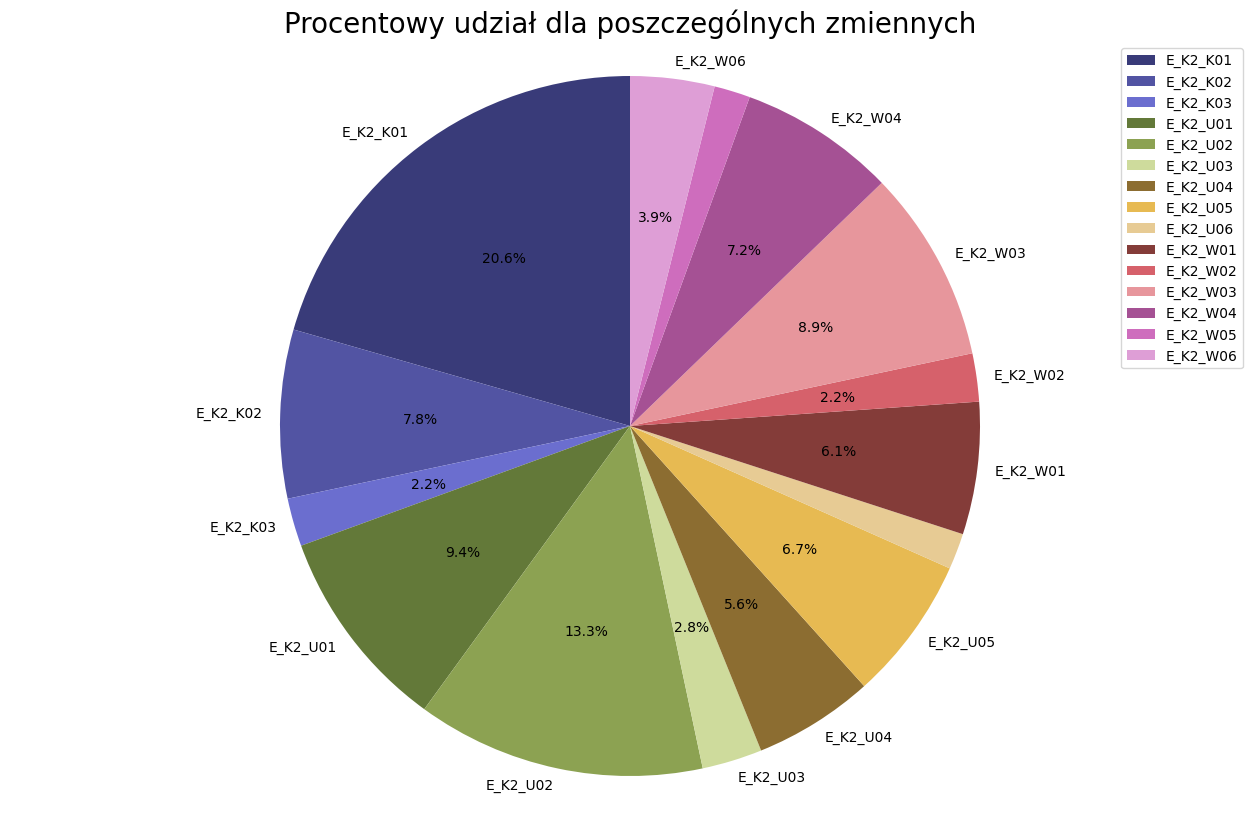

In [9]:

suma_codes = [df[col].sum() for col in df.columns]
variable_names = df.columns

total = sum(suma_codes)
percentages = [(count / total) * 100 for count in suma_codes]
labels = [f'{name}' if percentage > 2 else '' for name, percentage in zip(variable_names, percentages)]

plt.figure(figsize=(16, 10))  # Rozmiar wykresu

# Definicja palety kolorów (tab20b)
palette = plt.cm.get_cmap('tab20b', len(variable_names))

# Wygeneruj więcej kolorów z palety interpolując między dostępnymi kolorami
colors = palette(np.linspace(0, 1, len(variable_names)))

# Stwórz wykres kołowy z wygenerowanymi kolorami
patches, _, _ = plt.pie(suma_codes, labels=labels, colors=colors, startangle=90, autopct=lambda pct: f'{pct:.1f}%' if pct > 2 else '', labeldistance=1.05)

plt.title('Procentowy udział dla poszczególnych zmiennych', fontsize=20)  # Zwiększenie rozmiaru tytułu

# Utwórz legendę na podstawie nazw zmiennych 
plt.legend(patches, variable_names, loc='upper right')

plt.axis('equal')  # Ustawienie równych proporcji, aby wykres był kołem


plt.show()



### Statystyki opisowe

In [ ]:
skewnesses = skew(df, axis=0)
kurtosises = kurtosis(df, axis=0)
stats = pd.concat([df.describe(), pd.DataFrame({'skewness':skewnesses, 'kurtosis':kurtosises}, index=df.columns).T]).T
stats['coef_of_var'] = stats['std'] / stats['mean']
stats

,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis,coef_of_var
IE_K2_K01,42.0,0.452381,0.550050,0.0,0.0,0.0,1.0,2.0,0.634374,-0.742592,1.215900
IE_K2_K02,42.0,0.571429,0.800697,0.0,0.0,0.0,1.0,2.0,0.918596,-0.789698,1.401219
IE_K2_K03,42.0,0.214286,0.415300,0.0,0.0,0.0,0.0,1.0,1.392621,-0.060606,1.938065
IE_K2_K04,42.0,0.642857,1.077971,0.0,0.0,0.0,1.0,3.0,1.457539,0.580635,1.676843
IE_K2_K05,42.0,0.166667,0.377195,0.0,0.0,0.0,0.0,1.0,1.788854,1.200000,2.263173
IE_K2_U01,42.0,0.690476,1.047368,0.0,0.0,0.0,1.0,3.0,1.418255,0.664334,1.516878
IE_K2_U02,42.0,0.333333,0.686691,0.0,0.0,0.0,0.0,3.0,2.219337,4.615933,2.060073
IE_K2_U03,42.0,0.095238,0.297102,0.0,0.0,0.0,0.0,1.0,2.757764,5.605263,3.119568
IE_K2_U04,42.0,0.285714,0.553733,0.0,0.0,0.0,0.0,2.0,1.780340,2.200413,1.938065
IE_K2_U05,42.0,0.119048,0.327770,0.0,0.0,0.0,0.0,1.0,2.352687,3.535135,2.753269


**Weryfikacja skośności i kurtozy rozkładów zmiennych**

In [ ]:
def skew_statistic(data):
    return skew(data, axis=0)

def kurtosis_statistic(data):
    return kurtosis(data, axis=0)

data = (df.values[i] for i in range(df.shape[1]))
def bootstrap_for_xses(df, statistic, n_resamples=1000):
    skewness_mean = np.zeros(df.shape[1])
    kurtosis_mean = np.zeros(df.shape[1])
    skewness_intervals = np.zeros((df.shape[1], 2))
    kurtosis_intervals = np.zeros((df.shape[1], 2))
    for column in range(df.shape[1]):
        data = (df.values[column],)
        skewness_bootstrap = bootstrap(data=data, statistic=skew_statistic, n_resamples=n_resamples, confidence_level=.9)
        kurtosis_bootstrap = bootstrap(data=data, statistic=kurtosis_statistic, n_resamples=n_resamples, confidence_level=.9)
        skewness_mean[column] = np.mean(skewness_bootstrap.bootstrap_distribution)
        kurtosis_mean[column] = np.mean(kurtosis_bootstrap.bootstrap_distribution)
        skewness_intervals[column, :] = np.array(tuple(skewness_bootstrap.confidence_interval))
        kurtosis_intervals[column, :] = np.array(tuple(kurtosis_bootstrap.confidence_interval))

    return skewness_mean, kurtosis_mean, skewness_intervals, kurtosis_intervals



s, k, s_i, k_i = bootstrap_for_xses(df, skew_statistic, n_resamples=5000)

In [ ]:
def plot_statistic(statistic, confidence_intervals, name='statystyki', conf_level=.9):
    fig, ax = plt.subplots(figsize=(10,8))
    for i in range(statistic.shape[0]):
        plt.vlines(i, confidence_intervals[i,0], confidence_intervals[i,1], color='gray', zorder=0)
    ax.scatter(np.arange(statistic.shape[0]), statistic, color='black', zorder=1)
    plt.grid(False)
    plt.axhline(0, linestyle='--', alpha=0.5)
    ax.set_xticks(np.arange(statistic.shape[0]), labels=[f"X_{j}" for j in range(1, statistic.shape[0]+1)], rotation=45)
    ax.set_ylabel(name)
    plt.title(f"Średnia {name}, wraz z przedziałem ufności na poziomie ufności {conf_level}")

**Wykres dla skośności**

c:\Users\Dawid\anaconda3\Lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


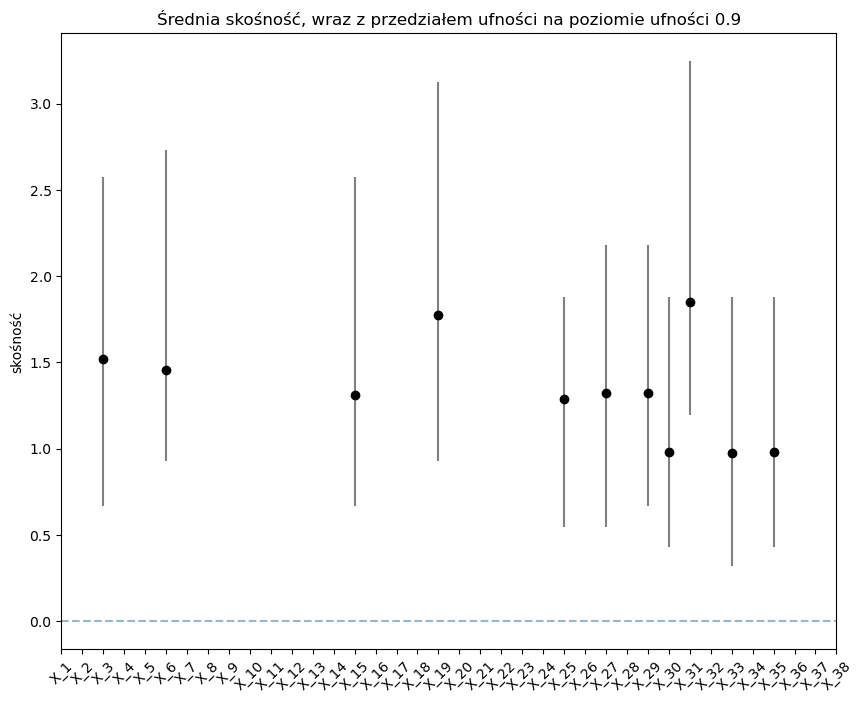

In [ ]:
plot_statistic(s, s_i, name="skośność")

**Wykres dla kurtozy**

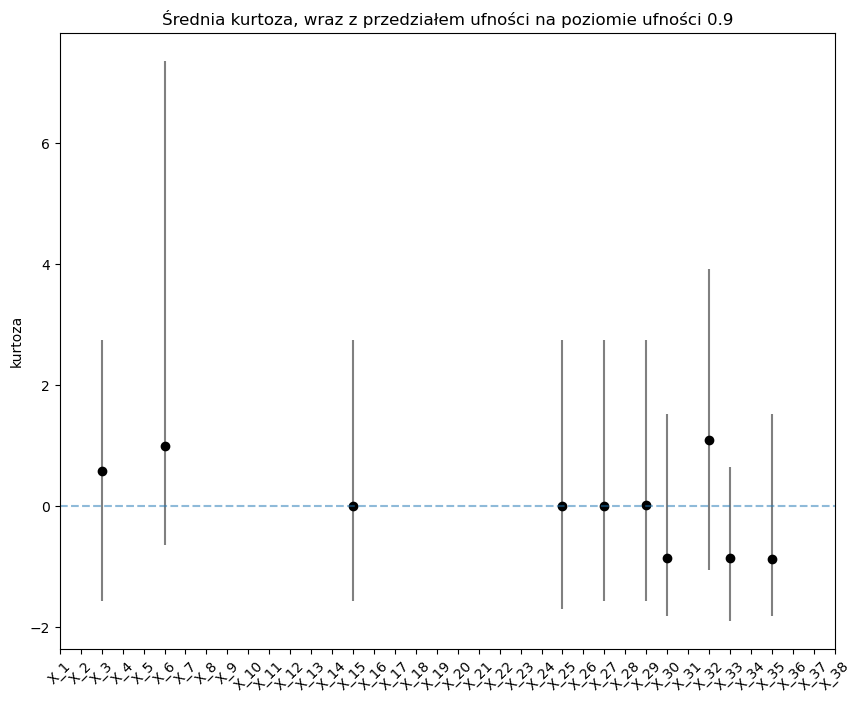

In [ ]:
plot_statistic(k, k_i, name="kurtoza")

# Opis metod

### Standaryzowanie zmiennych

In [ ]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [ ]:
scaled_df = pd.DataFrame(scaled_df, index = df.index, columns = df.columns)
final_df = scaled_df.copy()

### Redukcja wymiarów

Przygotujemy również dane za pomocą algorytmu Prinicipal Component Analysis do wyświetlenia na płaszczyźnie dwuwymiarowej, żeby lepiej móc obserwować efekty klastrowania. Jako, że nie jest to temat naszej pracy, więcej informacji na temat tej metody można znaleźć [tutaj](https://en.wikipedia.org/wiki/Principal_component_analysis). Nasz projekt wykorzystał implementację tego algorytmu pod postacią obiektu klasy [sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html), gdzie liczba składowych została ustawiona (w celach wizualizacji) na 2, a [rozkład według wektorów osobliwych](https://pl.wikipedia.org/wiki/Rozk%C5%82ad_wed%C5%82ug_warto%C5%9Bci_osobliwych) został dokonany metodą LAPACK (metodą, której korzenie sięgają języka Fortran).

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
dim_reduced_df = pca.fit_transform(final_df)

### Wyświetlanie wyników

Poniżej przygotowaliśmy funkcję, której zastosowanie w prezentowaniu wyników jest szerokie:
    - w przypadku braku podziałów (brak dostraczonych "predykcji" przynależności do klastra) nie wyświetla tytułu i nie nadaje wyróżniających kolorów punktom
    - w przypadku dostarczonych predykcji, nadaje tytuł wyjaśniający jaka metoda została użyta, dla ilu klastrów oraz na koniec koloruje punkty zgodnie z przynależnością do klastra.

In [ ]:
def plot_results(df_dim_2, title='', cluster_preds=np.array([])):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
    plt.style.use('dark_background')
    if cluster_preds.size:
        ax.set_title(f"Podział obiektów według metody {title}, liczba klastrów = {np.unique(cluster_preds).shape[0]}")
        ax.scatter(dim_reduced_df[:, 0], dim_reduced_df[:, 1], c=cluster_preds, cmap='cool')
    else:
        ax.scatter(dim_reduced_df[:, 0], dim_reduced_df[:, 1])
    for num, country in enumerate(final_df.index):
        plt.text(dim_reduced_df[num, 0], dim_reduced_df[num,1], country)

Poniżej wyniki redukcji wymiarów metodą PCA na naszym zbiorze danych:

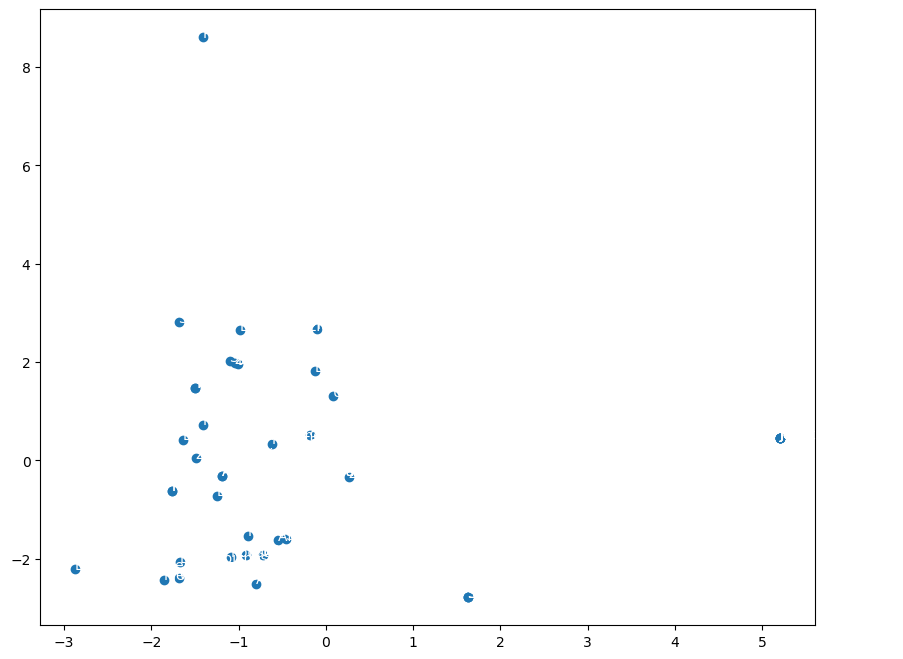

In [ ]:
plot_results(dim_reduced_df)

**Zastosowanie przykładowych modeli klastrujących.**


W tej sekcji pokażemy zastosowanie kilku wybranych algorytmów z biblioteki [sklearn.cluster](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster) na naszych danych.

In [ ]:
import sklearn.cluster as cl
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

### Miary jakości klastrowania

W obliczu takiej mnogości metod oraz tak dużej liczby kombinacji hyperparametrów, musieliśmy skorzystać z obiektywnych miar jakości klastrowania. Skorzystaliśmy z tych dostępnych w pakiecie [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics). \
Są to:
1. Silhouette Coefficient - miara jakości klastrowania, która mierzy dopasowanie obiektów do ich klastrów oraz ich odległość do innych klastrów. Więcej na temat tej miary można poczytać [na artykule na Wikipedii](https://en.wikipedia.org/wiki/Silhouette_(clustering)) lub [u źródła](https://www.sciencedirect.com/science/article/pii/0377042787901257). Współczynnik przyjmuje wartości z przedziału $[-1,  1]$, gdzie im wyższy współczynnik, tym lepsza jakoś klastrowania.
2. Caliński-Harabasz Index - miara jakości klastrowania, która mierzy rozdzielność klastrów. Wyznacza się ją jako stosunek sumy wariancji międzyklastrowej do sumy wariancji wewnątrzklastrowej. Przyjmuje wartości z przedziału $[0, +\infty)$, gdzie wyższe wartości oznaczają, że klastry są bardziej gęste i lepiej oddzielone od siebie. Więcej na temat tej metody w [artykule](https://www.tandfonline.com/doi/abs/10.1080/03610927408827101)
3. Davies-Bouldin Index - miara jakości klastrowania, która mierzy podobieństwo klastrów. Wyznacza się ją jako średnią wartość indeksu Davies-Bouldina dla wszystkich klastrów. Przyjmuje wartości z przedziału $[0, +\infty)$, im wyższa wartość miary, tym mniejsze podobieństwo klastrów. Więcej szczegółów w tym [artykule](https://ieeexplore.ieee.org/document/4766909)

### Funkcja do klastrowania

Przygotowaliśmy funkcję, której działanie jest podstawą naszej analizy. Możemy wybrać tryb kreślenia wykresu (plot=True), gdzie metoda klastrowania zostanie zastosowana na danych, wypisane zostaną miary jakości klatrowania (ale nie zwrócone) oraz wykres punktowy za pomocą funkcji *plot_results* zostanie wykonany. W przypadku flagi plot z wartością False, zostaną po prostu zwrócone wartości miar wymienonych w poprzednim punkcie dla danej metody.

In [ ]:
def fit_and_show(model, name='', plot=True):
    results = model.fit_predict(final_df)
    if plot:
        plot_results(final_df, name, results)
        print(f"Silhouette Coef: {silhouette_score(final_df, results)}")
        print(f"Calinski-Harabasz Index: {calinski_harabasz_score(final_df, results)}")
        print(f"Davies-Bouldin Index: {davies_bouldin_score(final_df, results)}")
        return
    return silhouette_score(final_df, results), calinski_harabasz_score(final_df, results), davies_bouldin_score(final_df, results)

## Dobór najlepszej metody klatrującej i odpowiedniej liczby klastrów.


W poprzedniej sekcji widzieliśmy działanie przykładowych modeli klastrujących na naszym zbiorze danych. W tej sekcji za pomocą trzech indeksów (wprowadzonych wcześniej) wybierzemy najlepszą metodę z większości dostępnych w pakiecie *sklearn.cluster*. Dobierzemy również odpowiednie hyperparametry liczby klastrów. Dobór będzie oparty o trzy wymienione wcześniej wskaźniki.


### Użyte metody

Wykorzystane algorytmy to większość z dostępnych w ramach pakietu [sklearn.cluster](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster) oraz metodę [sklearn.mixture.GaussianMixture](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture).

Lista wraz z krótszym opisem metod:
- [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) - metoda hierarchiczna, która łączy obiekty w klastry w oparciu o ich odległość. Można użyć różnych metryk odległości. W naszym przypadku użyjemy metody Warda.
- [Birch](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.Birch.html) - metoda hierarchiczna, która wykorzystuje drzewo decyzyjne do tworzenia klastrów.
- [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) - metoda niehierarchiczna, która przypisuje obiekty do klastrów w oparciu o ich odległość od ich najbliższego centrum klastra (tzw. centroida).
- [BisectingKMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.BisectingKMeans.html) - rozszerzenie metody KMeans, która dzieli zbiory na klastry w sposób iteracyjny.
- [MiniBatchKMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html) - wersja metody KMeans, która wykorzystuje minipakiety danych do obliczania centrów klastrów, jest ona szybsza od klasycznej, ale mniej dokładna.
- [SpectralClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html) - technika mająca swoje korzenie w teorii grafów, w której to podejście jest wykorzystywane do identyfikowania społeczności węzłów w grafie na podstawie łączących je krawędzi.
- [GaussianMixture](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) - metoda probabilistyczna, która zakłada, że dane pochodzą z mieszaniny rozkładów Gaussa.

Poniżej lista zaimportowanych modeli:

In [ ]:
import sklearn.cluster as cl
from sklearn.mixture import GaussianMixture

In [ ]:
models = [cl.AgglomerativeClustering, cl.Birch, cl.KMeans, cl.BisectingKMeans, cl.MiniBatchKMeans, cl.SpectralClustering, GaussianMixture]

Przygotujemy multindex, żeby móc zapisać każdej metodzie wartości trzech indeksów.

In [ ]:
import itertools
index = [np.array(list(itertools.chain.from_iterable([[model_name.__name__]*3 for model_name in models]))), np.array(['Silhouette Coef', 'Calinski-Harabasz Index', 'Davies-Bouldin Index'] * len(models))]
results = pd.DataFrame(np.zeros((index[0].shape[0], 9)), index=index, columns=np.arange(2, 11)) #inicjujemy pusty DataFrame na wyniki


Liczymy wartości miar dla wszystkich metod, z różnymi liczbami klastrów (od 2 do 11).

In [ ]:
for num_clasters in range(2, 11):
    for model in models:
        try:
            sc, chi, dbi = fit_and_show(model(n_clusters=num_clasters), plot=False)
        except Exception as e:
            sc, chi, dbi = fit_and_show(model(n_components=num_clasters), plot=False)
        results.loc[(model.__name__, 'Silhouette Coef'), num_clasters] = sc
        results.loc[(model.__name__, 'Calinski-Harabasz Index'), num_clasters] = chi
        results.loc[(model.__name__, 'Davies-Bouldin Index'), num_clasters] = dbi



c:\Users\Dawid\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Dawid\anaconda3\Lib\site-packages\sklearn\cluster\_bisect_k_means.py:245: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Dawid\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
c:\Users\Dawid\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: U

# Rezultaty

Poniższy DataFrame przedstawia dla każdej użytej metody klastrowania wyliczone trzy wcześniej wspomniane miary jakości klastrowania, wraz ze zmieniającą się liczbą klastrów:

In [ ]:
results

2         3         4   \
AgglomerativeClustering Silhouette Coef          0.156901  0.228957  0.248832   
                        Calinski-Harabasz Index  6.038147  5.534066  5.309425   
                        Davies-Bouldin Index     0.940805  0.882521  1.537133   
Birch                   Silhouette Coef          0.177141  0.132178  0.136075   
                        Calinski-Harabasz Index  3.376119  3.323887  3.287196   
                        Davies-Bouldin Index     2.286654  2.247438  1.729587   
KMeans                  Silhouette Coef          0.149046  0.182727  0.246462   
                        Calinski-Harabasz Index  5.784969  5.140558  5.081893   
                        Davies-Bouldin Index     1.831476  2.261128  1.996082   
BisectingKMeans         Silhouette Coef          0.096318  0.113820  0.045491   
                        Calinski-Harabasz Index  2.683774  3.685200  2.547913   
                        Davies-Bouldin Index     2.985958  2.599651  1.849640   
MiniBatchKMeans         Silhouette Coef          0.105035  0.197123  0.097161   
                        Calinski-Harabasz Index  2.667321  5.239605  2.987960   
                        Davies-Bouldin Index     1.663287  1.691738  2.476256   
SpectralClustering      Silhouette Coef          0.252800  0.242012  0.056938   
                        Calinski-Harabasz Index  2.415872  2.817829  2.744154   
                        Davies-Bouldin Index     0.611205  0.581133  1.779581   
GaussianMixture         Silhouette Coef          0.138589  0.084698  0.126400   
                        Calinski-Harabasz Index  2.897752  3.044996  3.116970   
                        Davies-Bouldin Index     2.079336  2.748950  2.465347   

                                                       5         6         7   \
AgglomerativeClustering Silhouette Coef          0.262885  0.271389  0.281008   
                        Calinski-Harabasz Index  5.134808  5.157809  5.218793   
                        Davies-Bouldin Index     1.651515  1.394790  1.347617   
Birch                   Silhouette Coef          0.144073  0.122421  0.119850   
                        Calinski-Harabasz Index  3.338622  3.215059  3.164578   
                        Davies-Bouldin Index     1.612847  1.466530  1.263455   
KMeans                  Silhouette Coef          0.247707  0.242730  0.267187   
                        Calinski-Harabasz Index  4.980303  4.425611  5.100728   
                        Davies-Bouldin Index     1.893239  1.972191  1.524170   
BisectingKMeans         Silhouette Coef          0.146971  0.218898  0.189676   
                        Calinski-Harabasz Index  3.774021  4.426695  4.340240   
                        Davies-Bouldin Index     1.955409  1.969820  1.914819   
MiniBatchKMeans         Silhouette Coef          0.252409  0.217228  0.207330   
                        Calinski-Harabasz Index  4.791661  4.082541  4.390205   
                        Davies-Bouldin Index     1.990100  1.918355  1.642497   
SpectralClustering      Silhouette Coef          0.014333  0.064890  0.026530   
                        Calinski-Harabasz Index  2.371379  2.479274  2.333419   
                        Davies-Bouldin Index     1.673473  1.825016  1.520966   
GaussianMixture         Silhouette Coef          0.165401  0.155893  0.258918   
                        Calinski-Harabasz Index  3.994273  3.113705  4.719412   
                        Davies-Bouldin Index     2.079515  1.617326  1.486888   

                                                       8         9         10  
AgglomerativeClustering Silhouette Coef          0.277381  0.283464  0.290760  
                        Calinski-Harabasz Index  5.199252  5.260523  5.411831  
                        Davies-Bouldin Index     1.407471  1.337908  1.221441  
Birch                   Silhouette Coef          0.109958  0.140003  0.133992  
                        Calinski-Harabasz Index  3.255542  3.815865  3.725008  
         

c:\Users\Dawid\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coef: 0.20845389596231673
Calinski-Harabasz Index: 5.351052192826364
Davies-Bouldin Index: 1.267910651672473


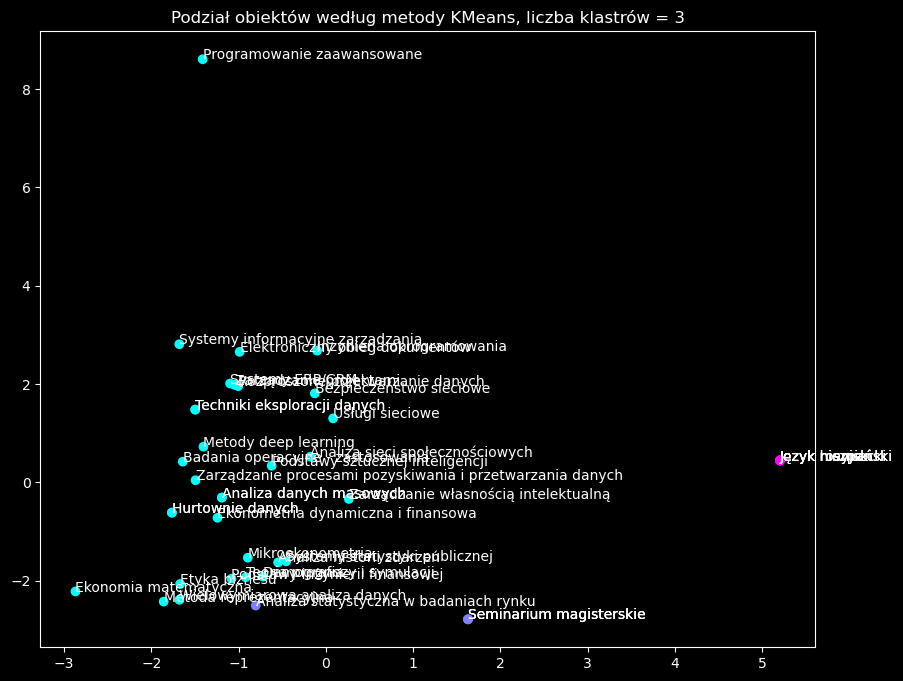

In [ ]:
fit_and_show(cl.KMeans(n_clusters=3), plot=True, name='KMeans')

c:\Users\Dawid\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coef: 0.20728693296288903
Calinski-Harabasz Index: 4.976757209791196
Davies-Bouldin Index: 1.9689736836354084


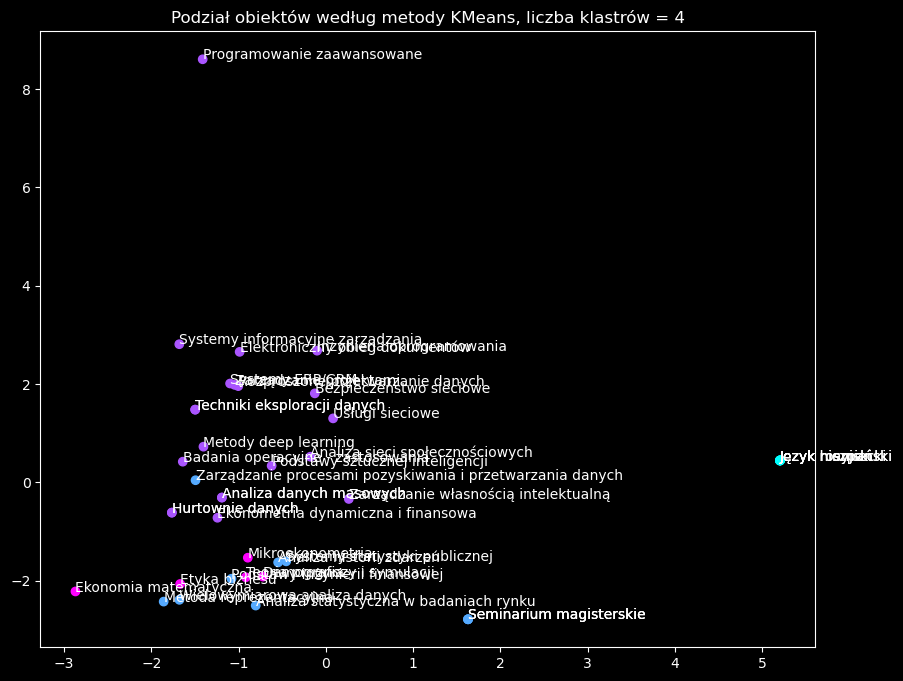

In [ ]:
fit_and_show(cl.KMeans(n_clusters=4), plot=True, name='KMeans')